<a href="https://colab.research.google.com/github/anhnguyenducminh/EEG_Physio_Envi_project/blob/main/Connection1_v10_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
#Do not run
#Format of input?
#2D input array into keras
!pip install --target=$nb_path shap
#!pip install --target=$nb_path opencv-python

     |████████████████████████████████| 371 kB 14.4 MB/s 
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [ ]:

import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

#4/1AX4XfWhv3cBxSin7WYEfMUa4vnyi5O4Cx-MYYR-hW-PeCAYZQBj7CH1b248

Mounted at /content/drive


In [ ]:
from google.colab import files

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

fname = 'AllModule-AnalysisColumnB.xlsx'
data_file = os.path.join("/content/drive/My Drive/", fname )
#uploaded = files.upload()
#filename = next(iter(uploaded))
dump = pd.ExcelFile(data_file)

HeartRate = dump.parse("Heart Rate")


rMSSD = dump.parse("rMSSD")


coverage = dump.parse("coverage")


low_frequency = dump.parse("low_frequency")


high_frequency = dump.parse("high_frequency")


SPO2 = dump.parse("SPO2")


Infrared = dump.parse("Infrared")


BodyTemp = dump.parse("Body Temp")


Respirator = dump.parse("Respirator")


Sleepscore = dump.parse("Sleep score")


Stress = dump.parse("Stress")


Mentally = dump.parse("Mentally")
Mentally= Mentally.drop(["Me note"], axis=1) 


Physically = dump.parse("Physically")
Physically = Physically.drop(["Ph note"], axis=1)

Physically_independent= Physically.drop(["Physically"], axis=1) 
Physically_dependent= Physically["Physically"].copy()

Mentally_independent= Mentally.drop(["Mentally"], axis=1) 
Mentally_dependent= Mentally["Mentally"].copy()

HeartRate_independent= HeartRate.drop(["Heart Rate"], axis=1) 
HeartRate_dependent= HeartRate["Heart Rate"].copy()

BodyTemp_independent= BodyTemp.drop(["Body Temp"], axis=1) 
BodyTemp_dependent= BodyTemp["Body Temp"].copy()

rMSSD_independent= rMSSD.drop(["rMSSD"], axis=1) 
rMSSD_dependent= rMSSD["rMSSD"].copy()

coverage_independent= coverage.drop(["coverage"], axis=1) 
coverage_dependent= coverage["coverage"].copy()

low_frequency_independent= low_frequency.drop(["low_frequency"], axis=1) 
low_frequency_dependent= low_frequency["low_frequency"].copy()

high_frequency_independent= high_frequency.drop(["high_frequency"], axis=1) 
high_frequency_dependent= high_frequency["high_frequency"].copy()

SPO2_independent= SPO2.drop(["SPO2"], axis=1) 
SPO2_dependent= SPO2["SPO2"].copy()

Infrared_independent= Infrared.drop(["Infrared"], axis=1) 
Infrared_dependent= Infrared["Infrared"].copy()

Respirator_independent= Respirator.drop(["Respirator"], axis=1) 
Respirator_dependent= Respirator["Respirator"].copy()

Sleepscore_independent= Sleepscore.drop(["Sleep score"], axis=1)  
Sleepscore_dependent= Sleepscore["Sleep score"].copy()

Stress_independent= Stress.drop(["Stress"], axis=1) 
Stress_dependent= Stress["Stress"].copy()


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


.
------- HeartRate -------


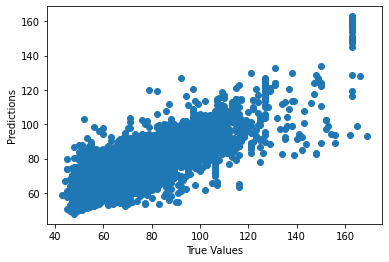

RandomForestRegressor(n_estimators=750, random_state=16)
0.7293142223425997


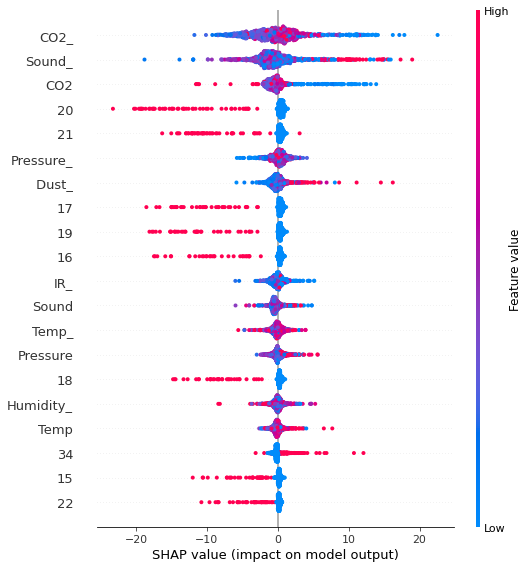

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

.
------- HeartRate -------


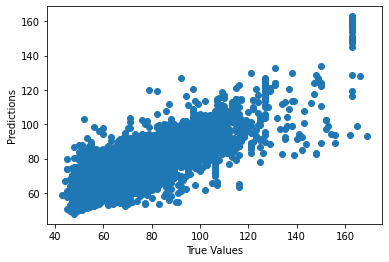

RandomForestRegressor(n_estimators=750, random_state=16)


AttributeError: ignored

In [ ]:
#unscaled training
import shap
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import export_graphviz 
from sklearn.metrics import mean_squared_error
import graphviz 
import operator
import math


enc = OneHotEncoder(handle_unknown='ignore')
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
times = np.asarray([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
enc.fit_transform(times.reshape(-1, 1))
enc.get_feature_names(['time'])

enc1 = OneHotEncoder(handle_unknown='ignore')
week = [31,32,33,34,35,36,37]
weeks = np.asarray([31,32,33,34,35,36,37])
enc1.fit_transform(weeks.reshape(-1, 1))
enc1.get_feature_names(['week'])

envi_axis = ["HeartRate","rMSSD","coverage","low_frequency","high_frequency","SPO2","Infrared","BodyTemp","Respirator","Sleepscore","Stress","Mentally","Physically"]
heal_axis = ['score','Sound','Sound_','Visible','Visible_','IR','IR_','UV','UV_','Temp','Temp_','Humidity','Humidity_','Pressure','Pressure_','CO2','CO2_',' Dust',' Dust_','Wind Direc','Wind Direc_','Wind Speed','Wind Speed_'] + time + week
names = ['Sound','Sound_','Visible','Visible_','IR','IR_','UV','UV_','Temp','Temp_','Humidity','Humidity_','Pressure','Pressure_','CO2','CO2_',' Dust',' Dust_','Wind Direc','Wind Direc_','Wind Speed','Wind Speed_'] + time + week
output = pd.DataFrame(index = envi_axis, columns = heal_axis)
regressor = DecisionTreeRegressor(random_state = 0) 

for j in range(13):
  i = j + 1
  #i = 1
  if (i == 1):
    SourceData_train_independent = HeartRate_independent
    SourceData_train_dependent = HeartRate_dependent
    Segment = "HeartRate"
  if (i == 2):
    SourceData_train_independent = rMSSD_independent
    SourceData_train_dependent = rMSSD_dependent
    Segment = "rMSSD"
  if (i == 3):
    SourceData_train_independent = coverage_independent
    SourceData_train_dependent = coverage_dependent
    Segment = "coverage"
  if (i == 4):
    SourceData_train_independent = low_frequency_independent
    SourceData_train_dependent = low_frequency_dependent
    Segment = "low_frequency"
  if (i == 5):
    SourceData_train_independent = high_frequency_independent
    SourceData_train_dependent = high_frequency_dependent
    Segment = "high_frequency"
  if (i == 6):
    SourceData_train_independent = SPO2_independent
    SourceData_train_dependent = SPO2_dependent
    Segment = "SPO2"
  if (i == 7):
    SourceData_train_independent = Infrared_independent
    SourceData_train_dependent = Infrared_dependent
    Segment = "Infrared"
  if (i == 8):
    SourceData_train_independent = BodyTemp_independent
    SourceData_train_dependent = BodyTemp_dependent
    Segment = "BodyTemp"
  if (i == 9):
    SourceData_train_independent = Respirator_independent
    SourceData_train_dependent = Respirator_dependent
    Segment = "Respirator"
  if (i == 10):
    SourceData_train_independent = Sleepscore_independent
    SourceData_train_dependent = Sleepscore_dependent
    Segment = "Sleepscore"
  if (i == 11):
    SourceData_train_independent = Stress_independent
    SourceData_train_dependent = Stress_dependent
    Segment = "Stress"
  if (i == 12):
    SourceData_train_independent = Mentally_independent
    SourceData_train_dependent = Mentally_dependent
    Segment = "Mentally"
  if (i == 13):
    SourceData_train_independent = Physically_independent
    SourceData_train_dependent = Physically_dependent
    Segment = "Physically"
  if (SourceData_train_dependent.size > 1 and operator.not_(math.isnan(SourceData_train_dependent[0]))):
    y_train=SourceData_train_dependent 
    SourceData_train_independent = SourceData_train_independent.drop(["Altitude"], axis=1) 
    SourceData_train_independent = SourceData_train_independent.drop(["Altitude_"], axis=1) 
    sc_X = StandardScaler()

    
    real_time = np.asarray(SourceData_train_independent["DATE"])
    real_time = real_time.reshape(-1,1)
    TIME = enc.transform(real_time).toarray()
    TIME = pd.DataFrame(TIME, columns = time)

    weekday = np.asarray(SourceData_train_independent["Wday"])
    weekday = weekday.reshape(-1,1)
    WEEK = enc1.transform(weekday).toarray()
    WEEK = pd.DataFrame(WEEK, columns = week)

    SourceData_train_independent = SourceData_train_independent.drop(["DATE"], axis=1)
    SourceData_train_independent = SourceData_train_independent.drop(["Wday"], axis=1)
    SourceData_train_independent = SourceData_train_independent.values
    SourceData_train_independent =  pd.DataFrame(SourceData_train_independent)
    X_train=pd.concat([SourceData_train_independent, TIME, WEEK], axis=1)

    pre_mean = X_train.mean()
    pre_var = X_train.var()
    #X_train=sc_X.fit_transform(X_train.values) 
    pos_mean = X_train.mean()
    pos_var = X_train.var()
    
    
    X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,train_size = 0.8, test_size=0.2, random_state = 123)
    reg = RandomForestRegressor(max_depth=None, random_state=16, n_estimators=750).fit(X_train, y_train)
    
    predictions = reg.predict(X_test)
    plt.scatter(y_test,predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    print(".")
    print("-------",Segment,"-------")
    plt.show()
    print(reg)
    importances = reg.feature_importances_
    output.at[envi_axis[j],heal_axis[0]]  = r2_score(y_test,predictions)
    print(r2_score(y_test,predictions))
    output.at[envi_axis[j],heal_axis[1]]  = 0
    for o in range(11+11+24+7):
      output.at[envi_axis[j],heal_axis[1+o]]  = importances[o]

    explainer = shap.TreeExplainer(reg)
    p = shap.sample(X_train,1000)
    shap_values = explainer.shap_values(p)
    shap.summary_plot(shap_values, features=p, feature_names=names)
    output = output.to_csv('ScaledDataRegression.csv')
    files.download('ScaledDataRegression.csv')  
    

output = output.to_csv('ScaledDataRegression.csv')
files.download('ScaledDataRegression.csv')

In [ ]:
with open('/content/drive/My Drive/inputeeg.txt', 'rb+') as filehandle:
    filehandle.seek(-1, os.SEEK_END)
    filehandle.truncate()
with open('/content/drive/My Drive/outputeeg.txt', 'rb+') as filehandle:
    filehandle.seek(-1, os.SEEK_END)
    filehandle.truncate()
with open('/content/drive/My Drive/inputeeg.txt', 'a') as f:
    content = InputData[0:OutputData.shape[0],:,:,:,:].tostring()
    f.write(content[1:])
with open('/content/drive/My Drive/outputeeg.txt', 'a') as f:
    content = OutputData.tostring()
    f.write(content[1:])

In [ ]:
# deep learning model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv3D, Flatten, Dropout, AveragePooling3D

model = Sequential([
    Conv3D(16, kernel_size=(3, 3, 3), padding='same', activation='relu', 
           input_shape=(8, 217, 334, 3)),
    AveragePooling3D(pool_size=(2, 2, 2)),
    Dropout(0.2),
    Conv3D(32, kernel_size=(3, 3, 3), padding='same', activation='relu'),
    AveragePooling3D(pool_size=(2, 2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

print(model.summary())

model.compile(
    loss="mean_squared_error",
    optimizer="sgd",
    metrics=["accuracy"],
)
InputData = InputData[0:OutputData.shape[0],:,:,:,:]
train = model.fit(InputData, OutputData, epochs=5, validation_split=0.1)

In [ ]:
InputData = {}
OutputData = {}
with open('/content/drive/My Drive/inputeeg.txt') as f:
    #inputarr = eval(f.read())
    #inputarr = np.array(inputarr)
    inputarr = np.fromstring(f.read())
with open('/content/drive/My Drive/outputeeg.txt') as f:
    #outputarr = eval(f.read())
    #outputarr = np.array(outputarr)
    outputarr = np.fromstring(f.read())